In [1]:

import sys, os, importlib
sys.path.append(os.path.join(os.getcwd(), '..'))

import c4dynamics as c4d


In [2]:
dt = 0.05

In [3]:
seeker = c4d.sensors.lineofsight(dt, tau1 = 0.01, tau2 = 0.1)

target = c4d.datapoint()
missile = c4d.datapoint(x = 1000, vy = 50)


In [4]:
t = 0
tf = 10

while t <= tf:
    # 
    # relative position
    ##
    vTM = target.vel - missile.vel # missile-target relative velocity 
    rTM = target.pos - missile.pos # relative position 

    # 
    # seeker 
    ## 
    wf = seeker.measure(rTM, vTM) # filtered los vector 
    
    missile.y += dt * missile.vy
    missile.store(t)
    seeker.store(t)
    t += dt

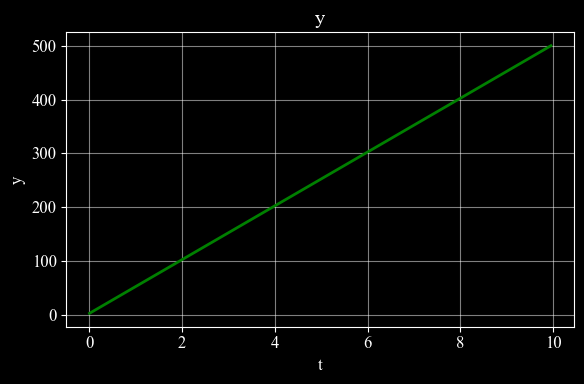

In [5]:
missile.draw('y')

(2.0, 3.0)

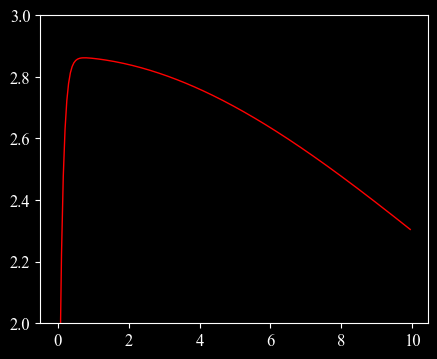

In [6]:
from matplotlib import pyplot as plt
# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
# %matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
# plt.rcParams['text.usetex'] = True

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
# %load_ext autoreload
# %autoreload 2

# 
# plt.show() plots all the figures present in the state machine. Calling it only at the end of 
#       the script, ensures that all previously created figures are plotted.
# Now you need to make sure that each plot indeed is created in a different figure. That can be 
#       achieved using plt.figure(fignumber) where fignumber is a number starting at index 1.
#

plt.figure(0)
plt.plot(seeker._data[:, 0], seeker._data[:, 3] * 180 / 3.14, 'k', linewidth = 2)
plt.plot(seeker._data[:, 0], seeker._data[:, 6] * 180 / 3.14, 'r', linewidth = 1)
plt.ylim(2, 3)
 
    
    